In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle
from analysing_entanglement import analysing_entanglement_obj
from analysing_measurement_entanglement import error_obj
from analysing_measurement_entanglement import analysing_entanglement_measurment_obj
from numpy_helpers import *
import math
import numpy as np
import shor_helpers as sh
import numpy_helpers as nph
from qm_shors_algorithm import *
import scipy.stats as stats

path_to_pickles = "/space/ge65kox/BA/pickles/"

obj = pickle.load(open(path_to_pickles+"ana_ent_objs_wo_measurement.pkl","rb"))
obj_meas = pickle.load(open(path_to_pickles+"entanglement_measurment_1.pkl","rb"))

In [3]:
# Load the data
p_success_fourier_mpo = np.array([obj[i].p_success_fourier_mpo for i in range(len(obj))])
p_success_fourier_circuit = np.array([obj[i].p_success_fourier_circuit for i in range(len(obj))])
N = np.array([obj[i].N for i in range(len(obj))])
x= np.array([obj[i].x for i in range(len(obj))])   


In [4]:
p_sucess_measurement = np.array([obj_meas[i].p_success_measurement for i in range(len(obj_meas))])
N_meas = np.array([obj_meas[i].N for i in range(len(obj_meas))])
x_meas = np.array([obj_meas[i].x for i in range(len(obj_meas))])



In [5]:
obj_meas_errors = pickle.load(open(path_to_pickles+"entanglement_measurment_1_errors.pkl","rb"))
print(len(obj_meas_errors))

9


In [6]:
#get number of prime factors
def calculate_prime_factors(N):
    prime_factors = []
    while N % 2 == 0:
        N = N // 2
        prime_factors.append(2)
        if N == 1:
            return prime_factors
    for factor in range(3, N + 1, 2):
        while N % factor == 0:
            N = N // factor
            prime_factors.append(factor)
            if N == 1:
                return prime_factors

#calculate the order of x^r mod N
def calculate_order(x,N):
    r = 1
    while pow((int)(x),r,mod = (int)(N)) != 1:
        r += 1
    return r

order = [calculate_order(x[i],N[i]) for i in range(len(N))]
len_a = [ (int)(np.ceil(np.log2(N[i]))) for i in range(len(N))]

order_meas = [calculate_order(x_meas[i],N_meas[i]) for i in range(len(N_meas))]


In [7]:
for i in range(len(N_meas)):
    print("N: ",N_meas[i],"x: ",x_meas[i],"order: ",order_meas[i])

N:  33 x:  10 order:  2
N:  35 x:  31 order:  6
N:  39 x:  31 order:  4
N:  45 x:  23 order:  12
N:  51 x:  41 order:  16
N:  55 x:  51 order:  10
N:  63 x:  20 order:  6
N:  65 x:  43 order:  12
N:  69 x:  35 order:  22
N:  75 x:  44 order:  10
N:  77 x:  17 order:  30
N:  85 x:  2 order:  8
N:  87 x:  37 order:  28
N:  91 x:  88 order:  6
N:  93 x:  74 order:  30
N:  95 x:  56 order:  2
N:  99 x:  32 order:  6
N:  105 x:  92 order:  4
N:  111 x:  101 order:  6
N:  115 x:  87 order:  44
N:  117 x:  5 order:  12
N:  119 x:  90 order:  16
N:  123 x:  55 order:  8
N:  129 x:  82 order:  14
N:  133 x:  47 order:  18
N:  135 x:  112 order:  36
N:  141 x:  50 order:  46
N:  143 x:  58 order:  60
N:  145 x:  24 order:  14
N:  147 x:  61 order:  42
N:  153 x:  44 order:  16
N:  155 x:  152 order:  60
N:  159 x:  133 order:  52
N:  161 x:  104 order:  22
N:  165 x:  82 order:  20
N:  171 x:  103 order:  6
N:  175 x:  39 order:  30
N:  177 x:  58 order:  2
N:  183 x:  167 order:  30
N:  185 x: 

In [8]:
#get euler totient
def calculate_euler_totient(r):
    phi = 0
    for i in range(1,r):
        if math.gcd(i,r) == 1:
            phi += 1
    return phi

euler_totient = [calculate_euler_totient(order[i]) for i in range(len(order))]

#Calculate predicted succes probability
def calculate_predicted_success_probability(order):
    p_predicted = []
    for i in range(len(N)):
        euler_totient = calculate_euler_totient(order[i])
        p_predicted.append(euler_totient/order[i])
    return p_predicted

p_predicted = calculate_predicted_success_probability(order)




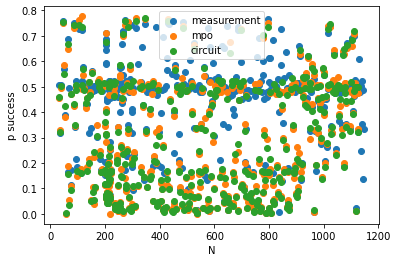

In [9]:


# Plot the data
plt.scatter(N_meas,p_sucess_measurement,label="measurement")
plt.scatter(N[:len(N_meas)],p_success_fourier_mpo[:len(N_meas)],label="mpo")
plt.scatter(N[:len(N_meas)],p_success_fourier_circuit[:len(N_meas)],label="circuit")
plt.xlabel("N")
plt.ylabel("p success")
plt.legend()
plt.show()


In [10]:
#get maximum_entanglement_entropy
def get_max_entanglement_entropy(entanglement_entropy):
    return np.max(entanglement_entropy)

def get_max_bond_dimension(schmidt_values):
    l = [len(s) for s in schmidt_values]
    return np.max(l) 

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


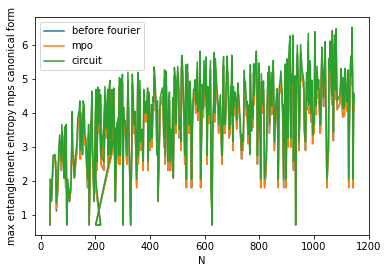

/usr/lib/python3/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


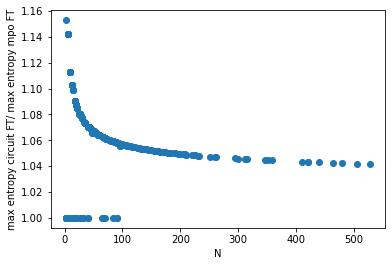

In [11]:
#Get the data
entanglement_entropy_before_fourier = np.array([get_max_entanglement_entropy(obj[i].entanglement_entropy_before_fourier) for i in range(len(obj))])
entanglement_entropy_fourier_mpo = np.array([get_max_entanglement_entropy(obj[i].entanglement_entropy_fourier_mpo) for i in range(len(obj))])
entanglement_entropy_fourier_circuit = np.array([get_max_entanglement_entropy(obj[i].entanglement_entropy_fourier_circuit) for i in range(len(obj))])
entanglement_entropy_before_fourier_meas = np.array([get_max_entanglement_entropy(obj_meas[i].entanglement_entropy_before_fourier) for i in range(len(obj_meas))])
entanglement_entropy_after_measurement = np.array([get_max_entanglement_entropy(obj_meas[i].entanglement_entropy_measurement_before_fourier) for i in range(len(obj_meas))])
entanglement_entropy_measurement_fourier = np.array([get_max_entanglement_entropy(obj_meas[i].entanglement_entropy_measurement_after_fourier) for i in range(len(obj_meas))])

#Plot the data
plt.plot(N,entanglement_entropy_before_fourier,label="before fourier")
plt.plot(N,entanglement_entropy_fourier_mpo,label="mpo")
plt.plot(N,entanglement_entropy_fourier_circuit,label="circuit")
plt.xlabel("N")
plt.ylabel("max entanglement entropy mps canonical form")
plt.legend()
#plt.savefig("max_entanglement_entropy.pdf")
plt.show()


plt.scatter(order,entanglement_entropy_fourier_circuit/entanglement_entropy_fourier_mpo)
plt.xlabel("N")
plt.ylabel("max entropy circuit FT/ max entropy mpo FT")
#plt.savefig("max_entanglement_entropy_circuit_divided_by_mpo.pdf")
plt.show()



404
404
404


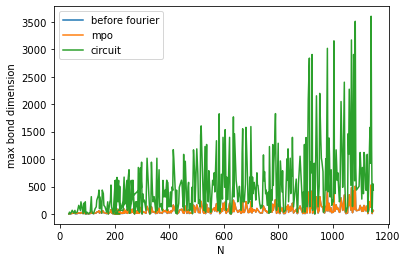

In [12]:
#Get the data
max_bond_dim_before_fourier = np.array([get_max_bond_dimension(obj[i].schmidt_values_before_fourier) for i in range(len(obj))])
max_bond_dim_fourier_mpo = np.array([get_max_bond_dimension(obj[i].schmidt_values_fourier_mpo) for i in range(len(obj))])
max_bond_dim_fourier_circuit = np.array([get_max_bond_dimension(obj[i].schmidt_values_fourier_circuit) for i in range(len(obj))])
max_bond_dim_before_fourier_meas = np.array([get_max_bond_dimension(obj_meas[i].schmidt_values_before_fourier) for i in range(len(obj_meas))])
max_bond_dim_measurement_before_fourier = np.array([get_max_bond_dimension(obj_meas[i].schmidt_values_measurement_before_fourier) for i in range(len(obj_meas))])
max_bond_dim_measurement_after_fourier = np.array([get_max_bond_dimension(obj_meas[i].schmidt_values_measurement_after_fourier) for i in range(len(obj_meas))])

print(len(max_bond_dim_before_fourier))
print(len(max_bond_dim_fourier_mpo))
print(len(max_bond_dim_fourier_circuit))


#Plot the data
plt.plot(N,max_bond_dim_before_fourier,label="before fourier")
plt.plot(N,max_bond_dim_fourier_mpo,label="mpo")
plt.plot(N,max_bond_dim_fourier_circuit,label="circuit")
plt.xlabel("N")
plt.ylabel("max bond dimension")
plt.legend()
#plt.savefig("max_bond_dimension.pdf")
plt.show()


In [13]:
#print N x and order
for i in range(len(N)):
    print("i:",i,"N: ",N[i],"x: ",x[i],"order: ",order[i])
    

i: 0 N:  33 x:  10 order:  2
i: 1 N:  35 x:  31 order:  6
i: 2 N:  39 x:  31 order:  4
i: 3 N:  45 x:  23 order:  12
i: 4 N:  51 x:  41 order:  16
i: 5 N:  55 x:  51 order:  10
i: 6 N:  57 x:  49 order:  3
i: 7 N:  63 x:  20 order:  6
i: 8 N:  65 x:  43 order:  12
i: 9 N:  69 x:  35 order:  22
i: 10 N:  75 x:  44 order:  10
i: 11 N:  77 x:  17 order:  30
i: 12 N:  85 x:  2 order:  8
i: 13 N:  87 x:  37 order:  28
i: 14 N:  91 x:  88 order:  6
i: 15 N:  93 x:  74 order:  30
i: 16 N:  95 x:  56 order:  2
i: 17 N:  99 x:  32 order:  6
i: 18 N:  105 x:  92 order:  4
i: 19 N:  111 x:  101 order:  6
i: 20 N:  115 x:  87 order:  44
i: 21 N:  117 x:  5 order:  12
i: 22 N:  119 x:  90 order:  16
i: 23 N:  123 x:  55 order:  8
i: 24 N:  129 x:  82 order:  14
i: 25 N:  133 x:  47 order:  18
i: 26 N:  135 x:  112 order:  36
i: 27 N:  141 x:  50 order:  46
i: 28 N:  143 x:  58 order:  60
i: 29 N:  145 x:  24 order:  14
i: 30 N:  147 x:  61 order:  42
i: 31 N:  153 x:  44 order:  16
i: 32 N:  155 x:

In [14]:
figsizes = (9,5.625)

/usr/lib/python3/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/usr/lib/python3/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


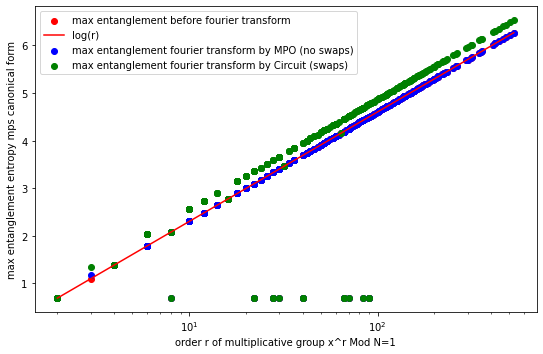

slope 6.975688621129058 intercept -9.703697330846467 r2 0.9907162293227494 p 0.0 se 0.04774101665068311


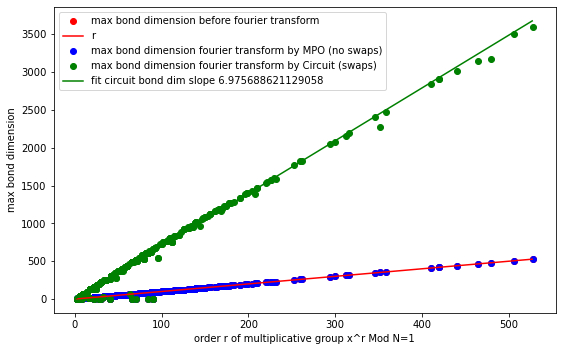

In [15]:
plt.figure(figsize=figsizes)
plt.scatter(order,entanglement_entropy_before_fourier,label="max entanglement before fourier transform",color="red")
r = [*range(min(order),max(order))]
plt.plot(r,np.log(r),label="log(r)",color="red")
plt.scatter(order,entanglement_entropy_fourier_mpo,label="max entanglement fourier transform by MPO (no swaps)",color="blue")
plt.scatter(order,entanglement_entropy_fourier_circuit,label="max entanglement fourier transform by Circuit (swaps)",color="green")
plt.xlabel("order r of multiplicative group x^r Mod N=1")
plt.ylabel("max entanglement entropy mps canonical form")
plt.xscale('log')
plt.legend()
plt.savefig("pictures/max_entanglement_entropy_fourier.pdf")
plt.show()


slope, intercept, r2, p, se = stats.linregress(order,max_bond_dim_fourier_circuit)
print("slope",slope,"intercept",intercept,"r2",r2,"p",p,"se",se)

plt.figure(figsize=figsizes)
plt.scatter(order,max_bond_dim_before_fourier,label="max bond dimension before fourier transform",color="red")
plt.plot(r,r,label="r",color="red")
plt.scatter(order,max_bond_dim_fourier_mpo,label="max bond dimension fourier transform by MPO (no swaps)",color="blue")
plt.scatter(order,max_bond_dim_fourier_circuit,label="max bond dimension fourier transform by Circuit (swaps)",color="green")
plt.plot(r,np.array(r)*slope,label="fit circuit bond dim slope "+str(slope),color="green")
plt.xlabel("order r of multiplicative group x^r Mod N=1")
plt.ylabel("max bond dimension")
plt.legend()
plt.savefig("pictures/max_bond_dimension_fourier.pdf")
plt.show()

In [16]:
#get outliers
for i in range(len(N)):
    if entanglement_entropy_fourier_circuit[i] < np.log(order[i]):
        print("outlier",i,"N",N[i],"x",x[i],"order",order[i],"entanglement entropy",entanglement_entropy_fourier_mpo[i])

outlier 75 N 201 x 101 order 66 entanglement entropy (0.6931471805599453+0j)
outlier 76 N 203 x 90 order 28 entanglement entropy (0.6931471805599453+0j)
outlier 77 N 205 x 58 order 40 entanglement entropy (0.6931471805599453+0j)
outlier 78 N 207 x 10 order 22 entanglement entropy (0.6931471805599454+0j)
outlier 79 N 209 x 79 order 90 entanglement entropy (0.6931471805599453+0j)
outlier 80 N 201 x 101 order 66 entanglement entropy (0.6931471805599453+0j)
outlier 81 N 203 x 90 order 28 entanglement entropy (0.6931471805599453+0j)
outlier 82 N 205 x 58 order 40 entanglement entropy (0.6931471805599453+0j)
outlier 83 N 207 x 10 order 22 entanglement entropy (0.6931471805599454+0j)
outlier 84 N 209 x 79 order 90 entanglement entropy (0.6931471805599453+0j)
outlier 85 N 213 x 206 order 70 entanglement entropy (0.6931471805599453+0j)
outlier 86 N 215 x 38 order 84 entanglement entropy (0.6931471805599454+0j)
outlier 87 N 217 x 44 order 30 entanglement entropy (0.6931471805599453+0j)
outlier 8

N 245
x 53
len_a 19


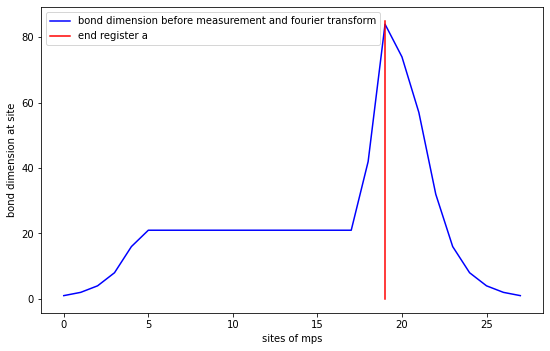

In [17]:
i = 102
print("N",N[i])
print("x",x[i])
plt.figure(figsize=figsizes)
schmidt_values_before_fourier = obj[i].schmidt_values_before_fourier
s = [len(schmidt_values_before_fourier[i]) for i in range(len(schmidt_values_before_fourier))]
plt.plot(s,label="bond dimension before measurement and fourier transform",color="blue")
len_a = 2*(int)(np.ceil(np.log2(N[i]))) + 3
print("len_a",len_a)
plt.plot([len_a,len_a],[0,s[len_a]+1],label = "end register a",color="red")
plt.xlabel("sites of mps")
plt.ylabel("bond dimension at site")
plt.legend()
plt.show()



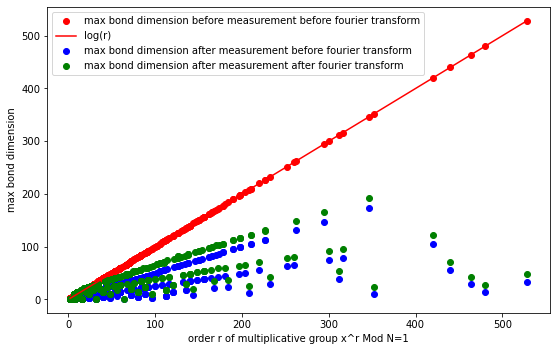

In [18]:
plt.figure(figsize=figsizes)
plt.scatter(order_meas,max_bond_dim_before_fourier_meas,label="max bond dimension before measurement before fourier transform",color="red")
r = [*range(min(order),max(order))]
plt.plot(r,r,label="log(r)",color="red")
plt.scatter(order_meas,max_bond_dim_measurement_before_fourier,label="max bond dimension after measurement before fourier transform",color="blue")
plt.scatter(order_meas,max_bond_dim_measurement_after_fourier,label="max bond dimension after measurement after fourier transform",color="green")
plt.xlabel("order r of multiplicative group x^r Mod N=1")
plt.ylabel("max bond dimension")
plt.legend()
plt.savefig("pictures/max_bond_dimension_after_measurement.pdf")
plt.show()

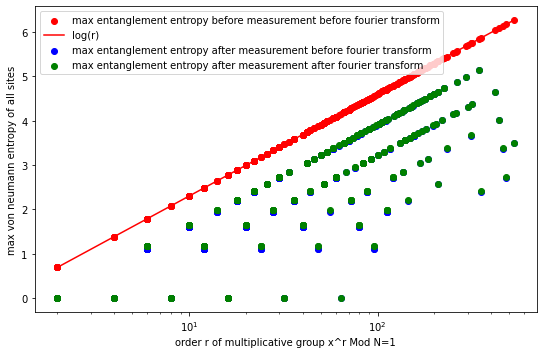

In [19]:
plt.figure(figsize=figsizes)
plt.scatter(order_meas,entanglement_entropy_before_fourier_meas,label="max entanglement entropy before measurement before fourier transform",color="red")
r = [*range(min(order),max(order))]
plt.plot(r,np.log(r),label="log(r)",color="red")
plt.scatter(order_meas,entanglement_entropy_after_measurement,label="max entanglement entropy after measurement before fourier transform",color="blue")
plt.scatter(order_meas,entanglement_entropy_measurement_fourier,label="max entanglement entropy after measurement after fourier transform",color="green")
plt.xlabel("order r of multiplicative group x^r Mod N=1")
plt.ylabel("max von neumann entropy of all sites")
plt.xscale('log')
plt.legend()
plt.savefig("pictures/max_entanglement_entropy_after_measurement_fourier.pdf")
plt.show()

In [32]:
for i in range(len(entanglement_entropy_after_measurement)):
    if entanglement_entropy_measurement_fourier[i] < 0.1:
        print("i",i,"N",N_meas[i],"x",x_meas[i],"order",order_meas[i],"entanglement entropy after measurement",entanglement_entropy_after_measurement[i],"entanglement entropy after measurement after fourier transform",entanglement_entropy_measurement_fourier[i])
        #print("i",i+1,"N",N_meas[i+1],"x",x_meas[i+1],"order",order_meas[i+1],"entanglement entropy after measurement",entanglement_entropy_after_measurement[i+1],"entanglement entropy after measurement after fourier transform",entanglement_entropy_measurement_fourier[i])

i 0 N 33 x 10 order 2 entanglement entropy after measurement -0.0 entanglement entropy after measurement after fourier transform -0.0
i 2 N 39 x 31 order 4 entanglement entropy after measurement -0.0 entanglement entropy after measurement after fourier transform -0.0
i 4 N 51 x 41 order 16 entanglement entropy after measurement -0.0 entanglement entropy after measurement after fourier transform -0.0
i 11 N 85 x 2 order 8 entanglement entropy after measurement -0.0 entanglement entropy after measurement after fourier transform -0.0
i 15 N 95 x 56 order 2 entanglement entropy after measurement -0.0 entanglement entropy after measurement after fourier transform -0.0
i 17 N 105 x 92 order 4 entanglement entropy after measurement -0.0 entanglement entropy after measurement after fourier transform -0.0
i 21 N 119 x 90 order 16 entanglement entropy after measurement -0.0 entanglement entropy after measurement after fourier transform -0.0
i 22 N 123 x 55 order 8 entanglement entropy after meas

N 77
x 17
len_a 17


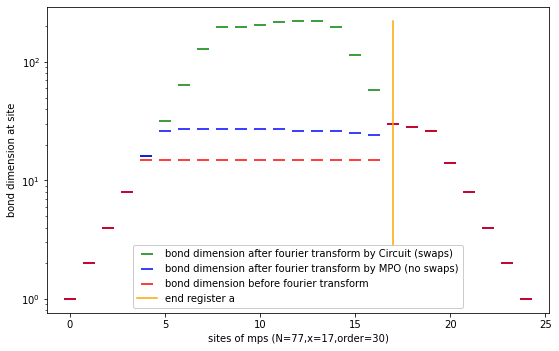

argmax_before_fourier 17 argmax_fourier_mpo 17 argmax_fourier_circuit 12


In [26]:
i = 11
print("N",N[i])
print("x",x[i])
schmidt_values_before_fourier = obj[i].schmidt_values_before_fourier
s_before_fourier = [len(schmidt_values_before_fourier[i]) for i in range(len(schmidt_values_before_fourier))]
schmidt_values_fourier_mpo = obj[i].schmidt_values_fourier_mpo
s_fourier_mpo = [len(schmidt_values_fourier_mpo[i]) for i in range(len(schmidt_values_fourier_mpo))]
schmidt_values_fourier_circuit = obj[i].schmidt_values_fourier_circuit
s_fourier_circuit = [len(schmidt_values_fourier_circuit[i]) for i in range(len(schmidt_values_fourier_circuit))]

s=150

x_position = range(len(s_before_fourier))
plt.figure(figsize=figsizes)
plt.scatter(x_position,s_fourier_circuit,s=s,label="bond dimension after fourier transform by Circuit (swaps)",color="green",marker="_")
plt.scatter(x_position,s_fourier_mpo,s=s,label="bond dimension after fourier transform by MPO (no swaps)",color="blue",marker="_")
plt.scatter(x_position,s_before_fourier,s=s,label="bond dimension before fourier transform",color="red",marker="_")

len_a = 2*(int)(np.ceil(np.log2(N[i]))) + 3
print("len_a",len_a)
plt.plot([len_a,len_a],[1,np.max(s_fourier_circuit)],label = "end register a",color="orange")
plt.xlabel("sites of mps (N="+str(N[i])+",x="+str(x[i])+",order="+str(order[i])+")")
plt.ylabel("bond dimension at site")
plt.yscale('log')
plt.savefig
plt.legend(loc="lower center",framealpha=1)
plt.savefig("pictures/bond_dimension_at_all_sites_N="+str(N[i])+",x="+str(x[i])+",order="+str(order[i])+".pdf")
plt.show()

argmax_before_fourier = np.argmax(s_before_fourier)
argmax_fourier_mpo = np.argmax(s_fourier_mpo)
argmax_fourier_circuit = np.argmax(s_fourier_circuit)
print("argmax_before_fourier",argmax_before_fourier,"argmax_fourier_mpo",argmax_fourier_mpo,"argmax_fourier_circuit",argmax_fourier_circuit)







1.0000000000000004
1.0000000000000004
1.0
[3.33333712e-02 3.33333712e-02 3.33159560e-02 3.33159560e-02
 3.33149342e-02 3.33149342e-02 3.31864311e-02 3.31864311e-02
 3.31825194e-02 3.31825194e-02 3.31051247e-02 3.31051247e-02
 3.29898767e-02 3.29898767e-02 3.29828589e-02 3.29828589e-02
 3.29736989e-02 3.29736989e-02 3.28755794e-02 3.28755794e-02
 3.28220533e-02 3.28220533e-02 3.27829272e-02 3.27829272e-02
 3.27754786e-02 3.27754786e-02 3.27708276e-02 3.27708276e-02
 3.27014449e-02 3.27014449e-02 5.89193452e-04 5.89193452e-04
 5.25023034e-04 5.25023034e-04 5.22266512e-04 5.22266512e-04
 5.12883650e-04 5.12883650e-04 4.77117202e-04 4.77117202e-04
 4.27677081e-04 4.27677081e-04 3.35573916e-04 3.35573916e-04
 3.34108724e-04 3.34108724e-04 3.20854794e-04 3.20854794e-04
 2.15272736e-04 2.15272736e-04 1.40798225e-04 1.40798225e-04
 1.37393517e-04 1.37393517e-04 4.19805388e-05 4.19805388e-05
 3.73661591e-05 3.73661591e-05 3.64109268e-05 3.64109268e-05
 3.48498576e-05 3.48498576e-05 3.34029643e-

1

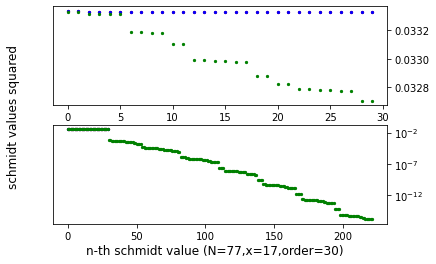

<Figure size 648x405 with 0 Axes>

In [27]:
fig, (ax1, ax2) = plt.subplots(2)
plt.figure(figsize=figsizes)
s=5
x_position = range(len(schmidt_values_before_fourier[argmax_before_fourier]))
ax2.scatter(x_position,np.power(schmidt_values_before_fourier[argmax_before_fourier],2),s=s,label="schmidt values before fourier transform at site: "+str(argmax_before_fourier),color="red")
ax2.scatter(x_position,np.power(schmidt_values_fourier_mpo[argmax_fourier_mpo],2),s=s,label="schmidt values after fourier transform by MPO (no swaps) at site: "+str(argmax_fourier_mpo),color="blue")
x_position = range(len(schmidt_values_fourier_circuit[argmax_fourier_circuit]))
ax2.scatter(x_position,np.power(schmidt_values_fourier_circuit[argmax_fourier_circuit],2),s=s,label="schmidt values after fourier transform by Circuit (swaps) at site: "+str(argmax_fourier_circuit),color="green")
ax2.set_yscale('log')
ax2.tick_params(labelright=True,labelleft=False,right=True,left=False)

x_position = range(len(schmidt_values_before_fourier[argmax_before_fourier]))
ax1.scatter(x_position,np.power(schmidt_values_before_fourier[argmax_before_fourier],2),s=s,label="schmidt values before fourier transform at site: "+str(argmax_before_fourier),color="red")
ax1.scatter(x_position,np.power(schmidt_values_fourier_mpo[argmax_fourier_mpo],2),s=s,label="schmidt values after fourier transform by MPO (no swaps) at site: "+str(argmax_fourier_mpo),color="blue")

ax1.scatter(x_position,np.power(schmidt_values_fourier_circuit[argmax_fourier_circuit][:len(schmidt_values_before_fourier[argmax_before_fourier])],2),s=s,label="schmidt values after fourier transform by Circuit (swaps) at site: "+str(argmax_fourier_circuit),color="green")
#ax1.set_yscale('log')
ax1.tick_params(labelright=True,labelleft=False,right=True,left=False)




fig.supxlabel("n-th schmidt value (N="+str(N[i])+",x="+str(x[i])+",order="+str(order[i])+")")
fig.supylabel("schmidt values squared")
fig.savefig("pictures/schmidt_values_at_max_site_N_"+str(N[i])+"_x_"+str(x[i])+"_order_"+str(order[i])+".pdf")
fig.show()

print(np.sum(np.power(schmidt_values_before_fourier[argmax_before_fourier],2)))
print(np.sum(np.power(schmidt_values_fourier_mpo[argmax_fourier_mpo],2)))
print(np.sum(np.power(schmidt_values_fourier_circuit[argmax_fourier_circuit],2)))
print(np.power(schmidt_values_fourier_circuit[argmax_fourier_circuit],2))
len(schmidt_values_fourier_circuit[argmax_fourier_circuit][s>10^(-8)])


/usr/lib/python3/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


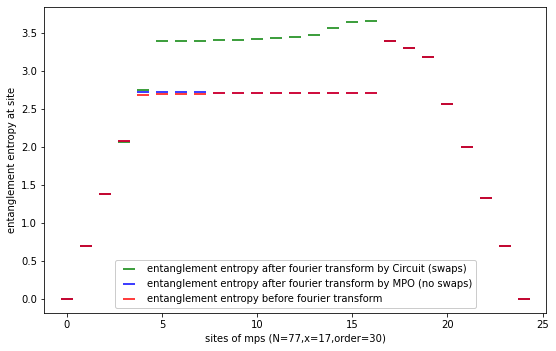

argmax_before_fourier 17 argmax_fourier_mpo 17 argmax_fourier_circuit 12


In [28]:
entanglement_entropy_before_fourier = obj[i].entanglement_entropy_before_fourier
entanglement_entropy_fourier_mpo = obj[i].entanglement_entropy_fourier_mpo
entanglement_entropy_fourier_mpo[0] = 0
entanglement_entropy_fourier_circuit = obj[i].entanglement_entropy_fourier_circuit

x_position = range(len(entanglement_entropy_before_fourier))

s= 150

plt.figure(figsize=figsizes)
plt.scatter(x_position,entanglement_entropy_fourier_circuit,s=s,label="entanglement entropy after fourier transform by Circuit (swaps)",color="green",marker="_")
plt.scatter(x_position,entanglement_entropy_fourier_mpo,s=s,label="entanglement entropy after fourier transform by MPO (no swaps)",color="blue",marker="_")
plt.scatter(x_position,entanglement_entropy_before_fourier,s=s,label="entanglement entropy before fourier transform",color="red",marker="_")
plt.xlabel("sites of mps (N="+str(N[i])+",x="+str(x[i])+",order="+str(order[i])+")")
plt.ylabel("entanglement entropy at site")
plt.legend(loc="lower center",framealpha=1)
plt.savefig("pictures/entanglement_entropy_all_sites_N="+str(N[i])+",x="+str(x[i])+",order="+str(order[i])+".pdf")
plt.show()

argmax_ent_before_fourier = np.argmax(entanglement_entropy_before_fourier)
argmax_ent_fourier_mpo = np.argmax(entanglement_entropy_fourier_mpo)
argmax_ent_fourier_circuit = np.argmax(entanglement_entropy_fourier_circuit)
print("argmax_before_fourier",argmax_before_fourier,"argmax_fourier_mpo",argmax_fourier_mpo,"argmax_fourier_circuit",argmax_fourier_circuit)
